GET CLUSTER LABELS BEFORE RUNNING THIS PIPELINE!

Set the sample dataset id and number of k clusters

In [1]:
sample = 1
k = 30

Compress create csc and csr formats

In [2]:
from compressor import compress
from scipy.io import mmread
from scipy.sparse import save_npz
import numpy as np
import os

label_path = 'compressed/neural/sample'+str(sample)+'/k'+str(k)+'/cluster_labels.pkl'
matrix_path = 'data/sample'+str(sample)+'/matrix.mtx'
out_path = 'compressed/neural/sample'+str(sample)+'/k'+str(k)

sparse_matrix = mmread(matrix_path)
csr = sparse_matrix.tocsr()
save_npz('data/sample'+str(sample)+'/csr.npz', csr)
output_prefix = 'data/sample'+str(sample)+'/csr_nozip/csr'
if not os.path.isdir('data/sample'+str(sample)+'/csr_nozip'):
    os.mkdir('data/sample'+str(sample)+'/csr_nozip')
np.save(f"{output_prefix}_data.npy", csr.data)
np.save(f"{output_prefix}_indices.npy", csr.indices)
np.save(f"{output_prefix}_indptr.npy", csr.indptr)
np.save(f"{output_prefix}_shape.npy", np.array(csr.shape))

csc = sparse_matrix.tocsc()
save_npz('data/sample'+str(sample)+'/csc.npz', csc)
output_prefix = 'data/sample'+str(sample)+'/csc_nozip/csc'
if not os.path.isdir('data/sample'+str(sample)+'/csc_nozip'):
    os.mkdir('data/sample'+str(sample)+'/csc_nozip')
np.save(f"{output_prefix}_data.npy", csc.data)
np.save(f"{output_prefix}_indices.npy", csc.indices)
np.save(f"{output_prefix}_indptr.npy", csc.indptr)
np.save(f"{output_prefix}_shape.npy", np.array(csc.shape))

Compress using our compressor

In [3]:
compress(label_path, matrix_path, out_path)

Apply gzip

In [4]:
import shutil

# copy cluster_genes.csv from high level to low level
def copy_file(source_path, destination_path):
    """Copies a file from the source path to the destination path.

    Args:
        source_path: The path to the file to be copied.
        destination_path: The path to the destination directory.
    """
    try:
         shutil.copy(source_path, destination_path)
         print(f"File copied successfully from {source_path} to {destination_path}")
    except FileNotFoundError:
        print(f"Error: Source file not found: {source_path}")
    except PermissionError:
         print(f"Error: Permission denied to access {source_path} or {destination_path}")
    except Exception as e:
         print(f"An unexpected error occurred: {e}")
    
copy_file(out_path + '/high_level_compress/cluster_genes.csv', out_path + '/low_level_compress')

# gzip high_level_compress dir and low_level_compress dir
import subprocess
subprocess.run(["zip", "-r", out_path + '/high_level_compress.gz', out_path + '/high_level_compress'])
subprocess.run(["zip", "-r", out_path + '/low_level_compress.gz', out_path + '/low_level_compress'])

File copied successfully from compressed/neural/sample1/k30/high_level_compress/cluster_genes.csv to compressed/neural/sample1/k30/low_level_compress
  adding: compressed/neural/sample1/k30/high_level_compress/ (stored 0%)
  adding: compressed/neural/sample1/k30/high_level_compress/counts.csv (deflated 82%)
  adding: compressed/neural/sample1/k30/high_level_compress/cluster_genes.csv (deflated 62%)
  adding: compressed/neural/sample1/k30/high_level_compress/deltas.csv (deflated 64%)
  adding: compressed/neural/sample1/k30/low_level_compress/ (stored 0%)
  adding: compressed/neural/sample1/k30/low_level_compress/cluster_genes.csv (deflated 62%)
  adding: compressed/neural/sample1/k30/low_level_compress/huffman_encoded_deltas (deflated 1%)
  adding: compressed/neural/sample1/k30/low_level_compress/huffman_encoded_counts (deflated 3%)
  adding: compressed/neural/sample1/k30/low_level_compress/counts_huffman_tree (deflated 89%)
  adding: compressed/neural/sample1/k30/low_level_compress/del

CompletedProcess(args=['zip', '-r', 'compressed/neural/sample1/k30/low_level_compress.gz', 'compressed/neural/sample1/k30/low_level_compress'], returncode=0)

Verify compression works

In [4]:
from compressor import high_level_decompress, low_level_decompress

in_path = 'compressed/neural/sample'+str(sample)+'/k'+str(k)
high_level_decompress(in_path, matrix_path)
low_level_decompress(in_path)

High Level Accuracy Check Passed
deltas huffman : ENCODED CORRECTLY!
counts huffman : ENCODED CORRECTLY!


Generate plots

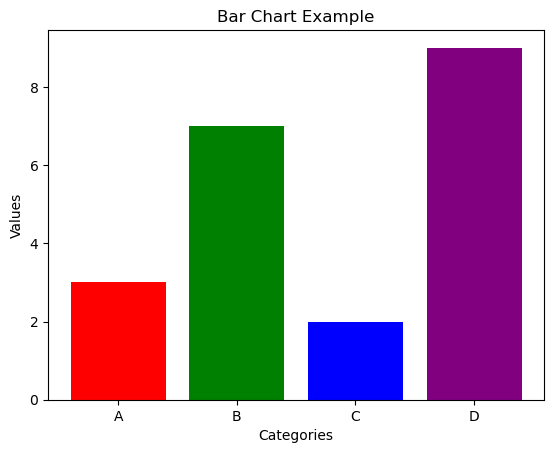

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C', 'D']
values = [3, 7, 2, 9]
colors = ['red', 'green', 'blue', 'purple']

# Create the bar chart
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Display the chart
plt.show()